In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Car_Price_Prediction.csv")
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657
...,...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,2,1,22765.597091
996,3,1,2020,3.1,149112,0,1,30392.575567
997,2,2,2008,1.9,195387,2,0,16446.892292
998,4,0,2003,4.4,246,2,0,27396.156708


In [6]:
x=df.drop("Price",axis=1)
y=df["Price"]
y

0      30246.207931
1      22785.747684
2      25760.290347
3      25638.003491
4      21021.386657
           ...     
995    22765.597091
996    30392.575567
997    16446.892292
998    27396.156708
999    31620.864907
Name: Price, Length: 1000, dtype: float64

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [8]:
model=RandomForestRegressor(n_estimators=50)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [9]:
y_pred=model.predict(x_test)
y_pred

array([25851.48612761, 29793.59149818, 27828.30121776, 26196.89269603,
       28801.45906063, 19566.08499805, 22677.6305179 , 27304.62160432,
       31006.42007551, 23434.67971224, 29303.16994448, 22062.80697195,
       19271.39029551, 26734.26903645, 26424.50201261, 27934.45118214,
       19986.40442552, 26565.01048818, 25038.04443029, 31962.67285212,
       22891.37668604, 20662.60443236, 17113.11161297, 22692.37541224,
       17943.13417892, 24263.99708269, 27869.00162941, 21321.42724906,
       24269.69322821, 29392.31521594, 19353.3384332 , 24661.11518259,
       24133.94216389, 33637.00610634, 30524.28834155, 30698.13157837,
       17300.92955004, 29186.71786833, 30599.61905708, 26069.84224479,
       31031.44415104, 25500.53858774, 30487.55969092, 25358.06472448,
       21699.07474901, 22123.70343868, 32390.01600491, 33281.11567286,
       24919.95684709, 22378.58876002, 33110.41499609, 21147.67525376,
       22651.06296037, 20048.57447235, 21805.47311474, 27576.16676888,
      

In [10]:
msc=mean_squared_error(y_pred,y_test)
print(msc)
rmsc=np.sqrt(msc)
print(rmsc)

5353655.106835737
2313.796686581545


In [11]:
score=r2_score(y_pred,y_test)
score

0.778275142658338

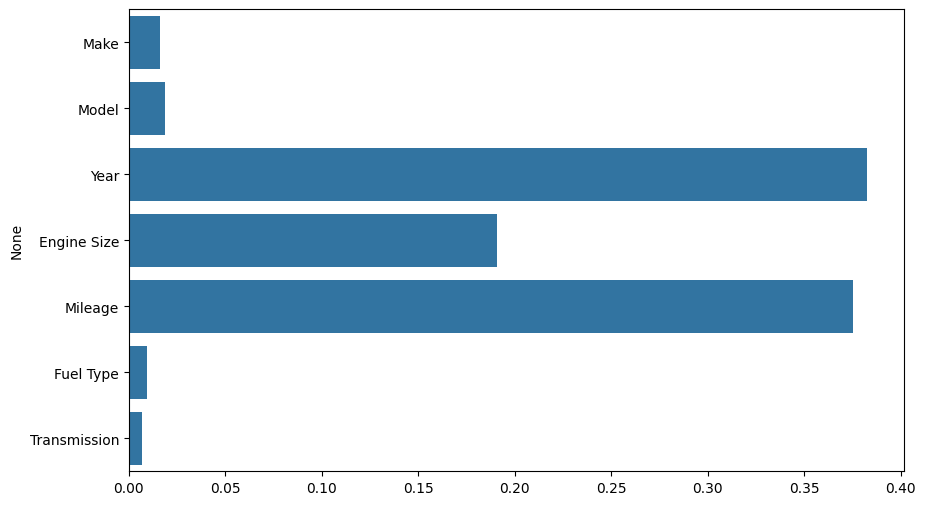

In [12]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [14]:
data=pd.DataFrame({
    "Make":["Honda"],
    "Model":["Model B"],
    "Year":[2015],
    "Engine Size":[3.9],
    "Mileage":[74176],
    "Fuel Type":["petrol"],
    "Transmission":["Manual"],
    
})
for i in data.select_dtypes(include=["object"]):
    data[i]=label.fit_transform(data[i])
predi=model.predict(data)
predi

array([30230.08971702])